In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter

In [2]:
df = pd.read_json("fenerbahce_beko_news_cleaned.json", lines=True)
df.head()

,title,text,date,clean_text
0,"Final Four Üçüncülük Maçında Fenerbahçe Beko, ...",by Eurohoops Team /info@eurohoops.net\nEurohoo...,25/May/24 22:13,turkish airlines euroleague 2023-24 sezonu fin...
1,Nate Sestina: “Şampiyon Olamadık Fakat Başımız...,by Bilal Baran Yardımcı /info@eurohoops.net\nE...,25/May/24 20:39,turkish airlines euroleague de final four yarı...
2,Nigel Hayes-Davis: “Üçüncülük Maçı mı? Avrupa’...,by Bilal Baran Yardımcı /info@eurohoops.net\nE...,25/May/24 19:03,turkish airlines euroleague final four unun ya...
3,Saras Jasikevicius’tan Eurohoops’a: “Üçüncülük...,by Alex Molina /info@eurohoops.net\nEurohoops ...,25/May/24 17:49,turkish airlines euroleague final four unun ya...
4,EuroLeague Final Four: Tarihin En Farklı Biten...,by Utkan Şahin /info@eurohoops.net\nFinal Four...,25/May/24 08:52,"final four, basketbolun bambaşka bir düzeyi. b..."


In [3]:
words = " ".join(df["clean_text"]).split()
word_counts = Counter(words)

# En çok geçen 20 kelime
word_counts.most_common(20)

[('bir', 38943),
 ('ve', 34827),
 ('bu', 25605),
 ('de', 24367),
 ('da', 23382),
 ('çok', 19742),
 ('i', 15884),
 ('euroleague', 15270),
 ('için', 13953),
 ('fenerbahçe', 13067),
 ('iyi', 11865),
 ('en', 10794),
 ('son', 10466),
 ('daha', 10360),
 ('ile', 9650),
 ('in', 9189),
 ('ilk', 7688),
 ('maç', 7501),
 ('ise', 7135),
 ('sayı', 7054)]

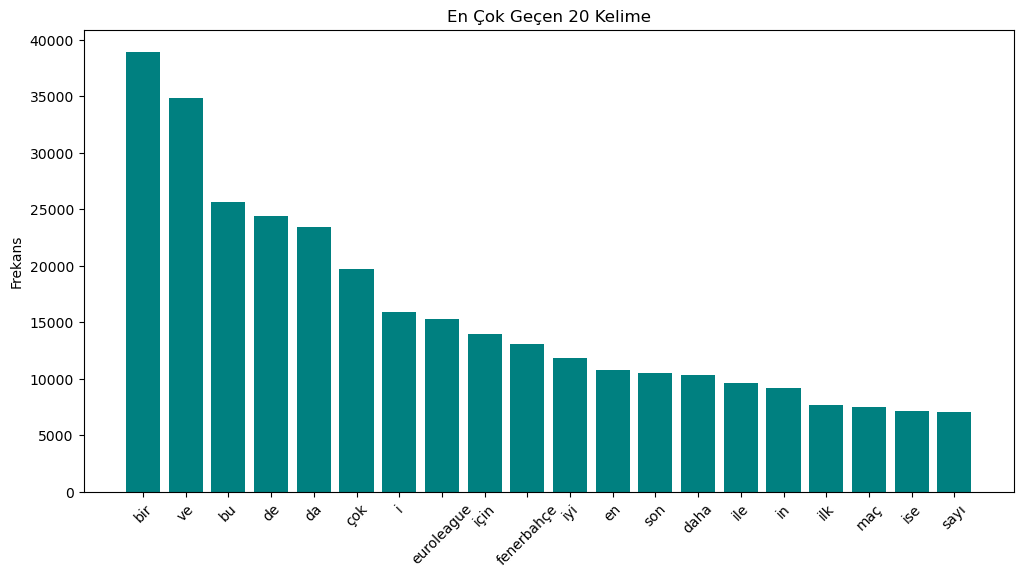

In [4]:
# Tüm clean_text sütununu birleştirip kelimelere ayır
all_words = " ".join(df["clean_text"]).split()

# Kelime frekansını hesapla
word_counts = Counter(all_words)

# En çok geçen 20 kelime
top20_words = word_counts.most_common(20)

words, counts = zip(*top20_words)

# Görselleştirme
plt.figure(figsize=(12,6))
plt.bar(words, counts, color='teal')
plt.xticks(rotation=45)
plt.title("En Çok Geçen 20 Kelime")
plt.ylabel("Frekans")
plt.show()

In [5]:
sw = set(stopwords.words("turkish"))

# En çok geçen stopwords’leri bul
stop_in_text = [w for w in words if w in sw]
stop_counter = Counter(stop_in_text)
stop_counter.most_common(20)

[('ve', 1),
 ('bu', 1),
 ('de', 1),
 ('da', 1),
 ('çok', 1),
 ('için', 1),
 ('en', 1),
 ('daha', 1),
 ('ile', 1),
 ('ise', 1)]

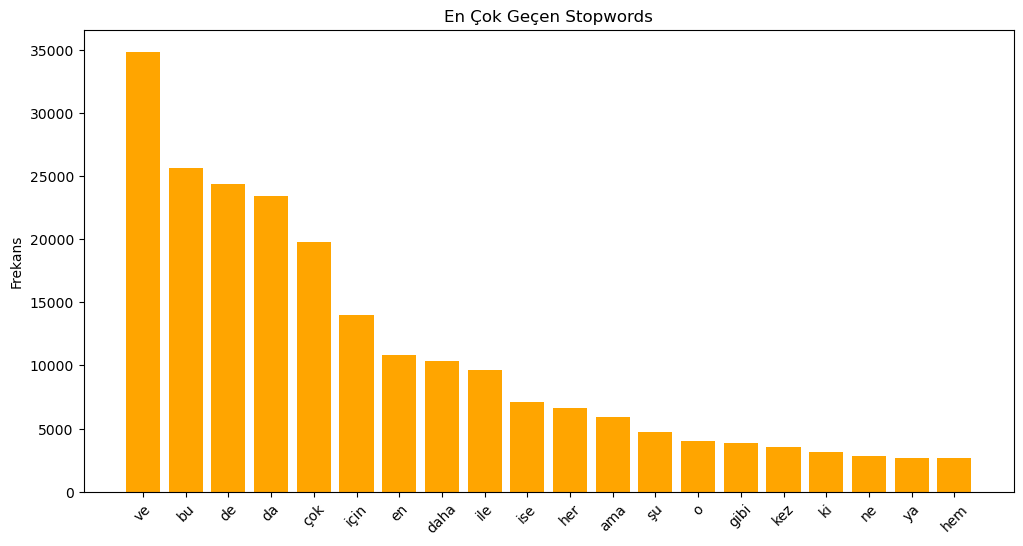

In [6]:
stop_words_tr = set(stopwords.words("turkish"))

# Stopwords’leri filtrele ve frekans hesapla
stopword_list = [w for w in all_words if w in stop_words_tr]
stopword_counts = Counter(stopword_list)
top20_stopwords = stopword_counts.most_common(20)

sw_words, sw_counts = zip(*top20_stopwords)

# Görselleştirme
plt.figure(figsize=(12,6))
plt.bar(sw_words, sw_counts, color='orange')
plt.xticks(rotation=45)
plt.title("En Çok Geçen Stopwords")
plt.ylabel("Frekans")
plt.show()

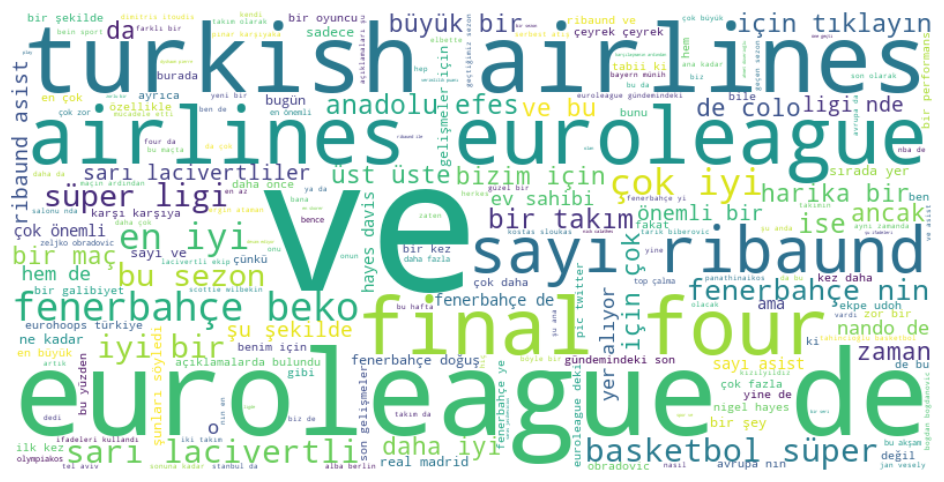

In [7]:
# !pip install wordcloud

text = " ".join(df["clean_text"])
wc = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

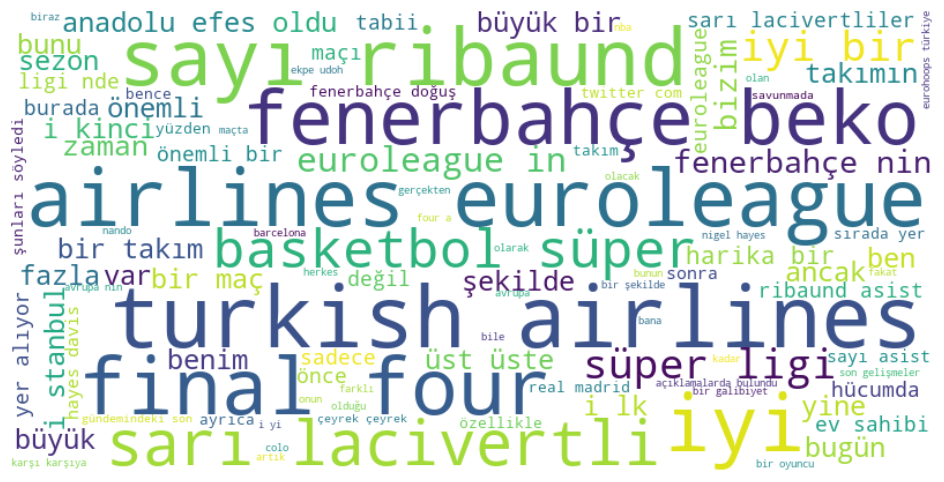

In [8]:
stop_words_tr = set(stopwords.words("turkish"))

text = " ".join(df["clean_text"])

wc = WordCloud(width=800, height=400,
               background_color="white",
               max_words=100,
               stopwords=stop_words_tr,
               colormap="viridis").generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()